### 데이터 불러오기

In [1]:
# 데이터 구성 패키지 : Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# grapviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz
# matplotlib 이용한 Background 그래프 실행 및 결과 확인
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree/RandomForest/그래디언트 부스팅
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# 모델 성능 평가 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
# mse와 mae 비교 / 주성분분석 / 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
# 최대 열 수 설정df_raw
pd.set_option('display.max_columns', 500)
# 표시할 가로의 길이
pd.set_option('display.width', 1000)
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix
#stats model
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
import statsmodels.api as sm8
#선형 회귀모형
from sklearn.linear_model import LinearRegression
import graphviz
import os
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from scipy import stats
#한글 폰트(나눔 고딕) 리눅스 환경이라 새로 설치를 했습니다.
matplotlib.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
# 폰트 사이즈
plt.rcParams['font.size'] = 10.
# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 10.
# y축 라벨사이즈
from sklearn.metrics import confusion_matrix

#한글 폰트(나눔 고딕) 리눅스 환경이라 새로 설치를 했습니다.
matplotlib.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
# 폰트 사이즈
plt.rcParams['font.size'] = 10.
# x축 라벨사이즈
plt.rcParams['xtick.labelsize'] = 10.
# y축 라벨사이즈
plt.rcParams['ytick.labelsize'] = 10.
#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 10.

plt.rcParams['ytick.labelsize'] = 10.
#그래프 축 폰트사이즈
plt.rcParams['axes.labelsize'] = 10.

os.environ["PATH"] += os.pathsep + "./graphviz/bin"

#로지스틱 회귀분석
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

#분류SVM
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix


%matplotlib inline

In [2]:
df_pre = pd.read_csv('insu_pre_review.csv',encoding = 'CP949')

In [3]:
df_pre.isnull().sum()

customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    2
waist                   2
bp_min                  0
bp_max                  0
pulse_count             4
bt_chol              3157
bt_crea              9187
bt_gluc              3157
bt_hb                7017
bt_hbsa              3157
bt_hct               7017
bt_mch               7017
bt_mchc              7017
bt_mvc               7017
bt_plat              7017
bt_rbc               7017
bt_wbc               7017
bt_rgpt              7926
bt_sgot              7671
bt_sgpt              3157
bt_trig              8222
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge        3157
bt_crea_judge        3157
bt_gluc_judge        3157
bt_hb_judge          3157
bt_hbsa_judge        3157
bt_hct_judge         3157
bt_mch_judge

In [4]:
df_pre[df_pre["pulse_count"].isnull()]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
2895,C116640,혈액검사,거절,2015-09-13,1,53,174,94,109.0,98.0,80,130,NaN,216.0,0.9,94.0,16.4,POSITIVE,48.7,31.2,33.7,92.8,234.0,525.0,6300.0,76.0,31.0,32.0,366.0,3,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7898,C123969,일반검진,재검,2015-06-07,2,59,158,56,85.0,70.0,80,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10961,C128201,일반검진,재검,2015-06-28,2,46,158,55,88.0,76.0,80,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11188,C128531,혈액검사,재검,2015-06-23,2,44,164,92,101.0,92.0,80,125,NaN,232.0,0.7,106.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,55.0,68.0,209.0,4,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [5]:
df_pre[df_pre["pulse_count_judge"]==0]["pulse_count"].mean()

69.447521963651

In [6]:
df_pre[df_pre["pulse_count_judge"]==0]["pulse_count"].median()

70.0

### 맥박 데이터 없는 사람들의 맥박 판정 결과 모두 정상

In [7]:
df_pre[df_pre["customer_id"]=="C116640"]["pulse_count_judge"]

2895    0
Name: pulse_count_judge, dtype: int64

In [8]:
df_pre[df_pre["customer_id"]=="C123969"]["pulse_count_judge"]

7898    0
Name: pulse_count_judge, dtype: int64

In [9]:
df_pre[df_pre["customer_id"]=="C128201"]["pulse_count_judge"]

10961    0
Name: pulse_count_judge, dtype: int64

In [10]:
df_pre[df_pre["customer_id"]=="C128531"]["pulse_count_judge"]

11188    0
Name: pulse_count_judge, dtype: int64

### 정상 맥박을 가진 사람들의 중앙값(=70)으로 맥박 결측치 대체

In [11]:
df_pre["pulse_count"].fillna(70, inplace=True)

In [12]:
df_pre.isnull().sum()

customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    2
waist                   2
bp_min                  0
bp_max                  0
pulse_count             0
bt_chol              3157
bt_crea              9187
bt_gluc              3157
bt_hb                7017
bt_hbsa              3157
bt_hct               7017
bt_mch               7017
bt_mchc              7017
bt_mvc               7017
bt_plat              7017
bt_rbc               7017
bt_wbc               7017
bt_rgpt              7926
bt_sgot              7671
bt_sgpt              3157
bt_trig              8222
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge        3157
bt_crea_judge        3157
bt_gluc_judge        3157
bt_hb_judge          3157
bt_hbsa_judge        3157
bt_hct_judge         3157
bt_mch_judge

### Bust, Waist 결측치 모두 동일인

In [13]:
df_pre["customer_id"][df_pre["bust"].isna()]

8951     C125485
14864    C134121
Name: customer_id, dtype: object

In [14]:
df_pre["customer_id"][df_pre["waist"].isna()]

8951     C125485
14864    C134121
Name: customer_id, dtype: object

### 국민 건강 검진 데이터 이용해서 결측치 대체 - Waist

In [15]:
df_test = df_pre[["gender","age","height","weight","bust","waist","bp_min","bp_max","pulse_count"]]
bust_corr = abs(df_test.corrwith(df_test["bust"])).sort_values(ascending = False)
print("bust의 상관계수",end="")
display(bust_corr[2:5].round(2))

waist_corr = abs(df_test.corrwith(df_test["waist"])).sort_values(ascending = False)
print("waist의 상관계수",end="")
display(waist_corr[2:5].round(2))

bust의 상관계수

weight    0.79
height    0.45
gender    0.45
dtype: float64

waist의 상관계수

weight    0.79
gender    0.48
height    0.42
dtype: float64

In [16]:
df_pre[["height","weight","gender"]][df_pre["bust"].isna()]

,height,weight,gender
8951,165,82,2
14864,167,57,2


In [17]:
def replace_(gender,height,weight): 
    re_ = df_pre[(df_pre["gender"]==gender)&(df_pre["height"]<=(height*1.03))\
                 &(df_pre["height"]>=(height*0.97))&(df_pre["weight"]<=(weight*1.03))\
                 &(df_pre["weight"]>=(weight*0.97))]
    return re_

In [18]:
df_pre.loc[8951,"bust"]=round(replace_(2,165,82)["bust"].mean(),0)
df_pre.loc[14864,"bust"]=round(replace_(2,167,57)["bust"].mean(),0)
df_pre.loc[8951,"waist"]=round(replace_(2,165,82)["waist"].mean(),0)
df_pre.loc[14864,"waist"]=round(replace_(2,167,57)["waist"].mean(),0)

In [19]:
df_pre.isnull().sum()

customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    0
waist                   0
bp_min                  0
bp_max                  0
pulse_count             0
bt_chol              3157
bt_crea              9187
bt_gluc              3157
bt_hb                7017
bt_hbsa              3157
bt_hct               7017
bt_mch               7017
bt_mchc              7017
bt_mvc               7017
bt_plat              7017
bt_rbc               7017
bt_wbc               7017
bt_rgpt              7926
bt_sgot              7671
bt_sgpt              3157
bt_trig              8222
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge        3157
bt_crea_judge        3157
bt_gluc_judge        3157
bt_hb_judge          3157
bt_hbsa_judge        3157
bt_hct_judge         3157
bt_mch_judge

In [20]:
df_person = df_pre[["gender","age","height","weight","bust","waist","bp_min","bp_max","pulse_count"]]

<AxesSubplot:title={'center':'gender'}, xlabel='judge'>

<AxesSubplot:title={'center':'age'}, xlabel='judge'>

<AxesSubplot:title={'center':'height'}, xlabel='judge'>

<AxesSubplot:title={'center':'weight'}, xlabel='judge'>

<AxesSubplot:title={'center':'bust'}, xlabel='judge'>

<AxesSubplot:title={'center':'waist'}, xlabel='judge'>

<AxesSubplot:title={'center':'bp_min'}, xlabel='judge'>

<AxesSubplot:title={'center':'bp_max'}, xlabel='judge'>

<AxesSubplot:title={'center':'pulse_count'}, xlabel='judge'>

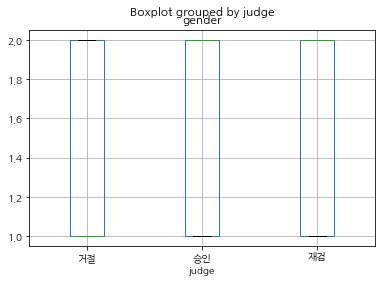

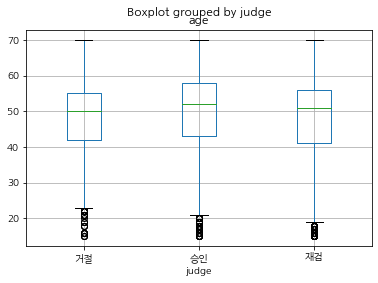

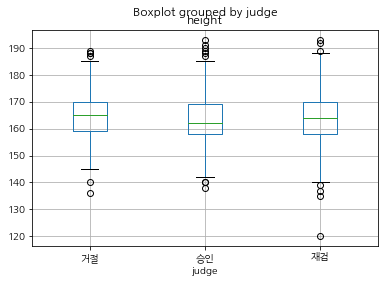

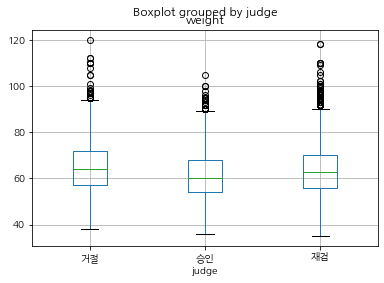

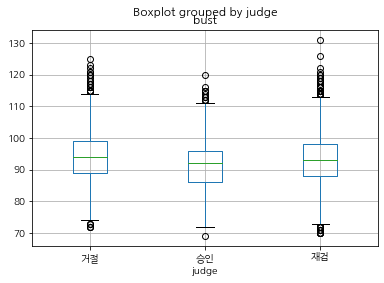

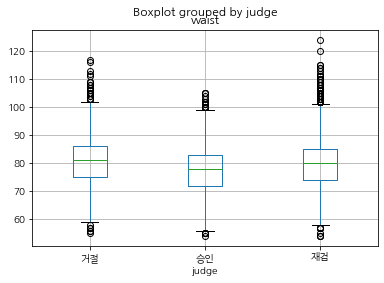

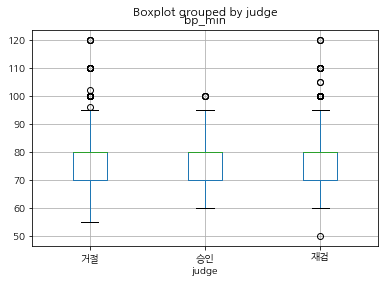

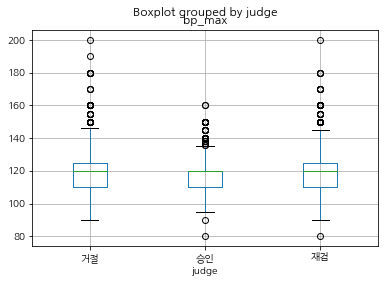

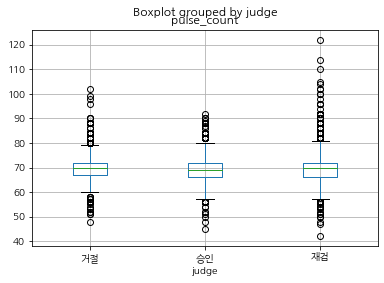

In [21]:
for col in df_person :
    display(df_pre.boxplot(column = col, by="judge"))

In [22]:
df_pre[df_pre["pulse_count"]>120]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
12532,C130364,혈액검사,재검,2015-08-23,2,31,160,54,95.0,71.0,70,100,122.0,167.0,0.5,111.0,13.5,NEGATIVE,41.3,29.0,33.0,89.0,225.0,464.0,4900.0,NaN,NaN,38.0,52.0,2,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_pre[df_pre["height"]<=125]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
14625,C133692,혈액검사,재검,2015-08-13,2,66,120,40,84.0,84.0,80,110,68.0,239.0,0.7,82.0,13.6,NEGATIVE,40.8,30.8,31.5,92.5,325.0,441.0,5580.0,NaN,NaN,23.0,103.0,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_pre = df_pre[df_pre['height']>120]
df_pre = df_pre[df_pre['pulse_count']<120]
df_pre = df_pre[df_pre['bust']<130]
df_pre.reset_index(drop=True, inplace=True)

## 이상치 확인 - bt_chol

In [25]:
df_pre.loc[:,["bt_chol","bt_chol_judge"]]

,bt_chol,bt_chol_judge
0,140.0,0.0
1,NaN,NaN
2,NaN,NaN
3,167.0,0.0
4,205.0,0.0
...,...,...
14930,238.0,0.0
14931,NaN,NaN
14932,NaN,NaN
14933,154.0,0.0


In [26]:
df_pre[df_pre["bt_chol_judge"]==1]["bt_chol"].min()

88.0

In [27]:
df_pre[(df_pre["bt_chol_judge"]==1)&(df_pre["bt_chol"]<=250)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
149,C112588,혈액검사,재검,2015-01-16,1,66,160,72,103.0,82.0,80,130,76.0,111.0,NaN,109.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,27.0,30.0,NaN,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,C112772,혈액검사,재검,2015-08-28,1,63,168,89,108.0,104.0,80,130,68.0,125.0,0.9,113.0,14.3,NEGATIVE,46.4,33.0,31.0,99.0,281.0,431.0,6200.0,69.0,21.0,21.0,85.0,2,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,C112785,혈액검사,거절,2015-09-17,1,63,168,55,87.0,76.0,75,115,68.0,112.0,1.0,116.0,15.5,NEGATIVE,45.6,34.0,34.0,99.0,216.0,451.0,5900.0,17.0,23.0,17.0,84.0,2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,C112848,혈액검사,재검,2015-09-13,1,62,158,72,98.0,100.0,80,120,68.0,235.0,0.8,76.0,15.2,NEGATIVE,46.4,31.5,32.8,96.3,260.0,482.0,6050.0,45.0,15.0,23.0,108.0,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,C112854,혈액검사,재검,2015-09-02,1,62,163,58,89.0,81.0,80,110,78.0,234.0,0.9,121.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,39.0,43.0,412.0,4,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
390,C112930,혈액검사,승인,2015-09-09,1,61,163,60,92.0,78.0,80,125,64.0,122.0,1.1,97.0,14.9,NEGATIVE,49.9,31.0,33.0,99.0,200.0,474.0,8800.0,27.0,16.0,22.0,107.0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,C112931,혈액검사,승인,2015-09-13,1,61,169,73,98.0,87.0,80,120,60.0,114.0,1.0,115.0,15.8,NEGATIVE,45.6,31.0,35.0,89.0,198.0,510.0,6100.0,56.0,32.0,36.0,145.0,2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,C113003,혈액검사,재검,2015-02-02,1,61,164,53,84.0,72.0,100,140,80.0,126.0,NaN,107.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,44.0,24.0,NaN,2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
442,C113011,혈액검사,거절,2015-09-01,1,61,173,72,100.0,86.0,80,120,66.0,123.0,1.0,154.0,NaN,POSITIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,137.0,99.0,74.0,6,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
570,C113233,혈액검사,재검,2014-12-16,1,59,169,75,100.0,90.0,80,120,64.0,124.0,NaN,104.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,31.0,65.0,NaN,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
df_pre[(df_pre["bt_chol_judge"]==1)&(df_pre["bt_chol"]<240)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
149,C112588,혈액검사,재검,2015-01-16,1,66,160,72,103.0,82.0,80,130,76.0,111.0,NaN,109.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,27.0,30.0,NaN,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,C112772,혈액검사,재검,2015-08-28,1,63,168,89,108.0,104.0,80,130,68.0,125.0,0.9,113.0,14.3,NEGATIVE,46.4,33.0,31.0,99.0,281.0,431.0,6200.0,69.0,21.0,21.0,85.0,2,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,C112785,혈액검사,거절,2015-09-17,1,63,168,55,87.0,76.0,75,115,68.0,112.0,1.0,116.0,15.5,NEGATIVE,45.6,34.0,34.0,99.0,216.0,451.0,5900.0,17.0,23.0,17.0,84.0,2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,C112848,혈액검사,재검,2015-09-13,1,62,158,72,98.0,100.0,80,120,68.0,235.0,0.8,76.0,15.2,NEGATIVE,46.4,31.5,32.8,96.3,260.0,482.0,6050.0,45.0,15.0,23.0,108.0,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,C112854,혈액검사,재검,2015-09-02,1,62,163,58,89.0,81.0,80,110,78.0,234.0,0.9,121.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,39.0,43.0,412.0,4,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
390,C112930,혈액검사,승인,2015-09-09,1,61,163,60,92.0,78.0,80,125,64.0,122.0,1.1,97.0,14.9,NEGATIVE,49.9,31.0,33.0,99.0,200.0,474.0,8800.0,27.0,16.0,22.0,107.0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,C112931,혈액검사,승인,2015-09-13,1,61,169,73,98.0,87.0,80,120,60.0,114.0,1.0,115.0,15.8,NEGATIVE,45.6,31.0,35.0,89.0,198.0,510.0,6100.0,56.0,32.0,36.0,145.0,2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,C113003,혈액검사,재검,2015-02-02,1,61,164,53,84.0,72.0,100,140,80.0,126.0,NaN,107.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,44.0,24.0,NaN,2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
442,C113011,혈액검사,거절,2015-09-01,1,61,173,72,100.0,86.0,80,120,66.0,123.0,1.0,154.0,NaN,POSITIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,137.0,99.0,74.0,6,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
570,C113233,혈액검사,재검,2014-12-16,1,59,169,75,100.0,90.0,80,120,64.0,124.0,NaN,104.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,31.0,65.0,NaN,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
df_pre[df_pre["bt_chol_judge"]==1]["bt_chol"].max()

402.0

In [30]:
df_pre[df_pre["bt_chol_judge"]==0]["bt_chol"].min()

116.0

In [31]:
df_pre[df_pre["bt_chol_judge"]==0]["bt_chol"].max()

250.0

In [32]:
df_pre[(df_pre["bt_chol"]>250)&(df_pre["bt_chol_judge"]==0)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge


In [33]:
a = df_pre[(df_pre["bt_chol"]<=250)&(df_pre["bt_chol_judge"]==1)]
a.loc[:,["bt_chol","bt_chol_judge"]]
a["bt_chol"].max()
a["bt_chol"].min()

88.0

In [34]:
df_pre[(df_pre["bt_chol"]<=250)&(df_pre["bt_chol_judge"]==1)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
149,C112588,혈액검사,재검,2015-01-16,1,66,160,72,103.0,82.0,80,130,76.0,111.0,NaN,109.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,27.0,30.0,NaN,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,C112772,혈액검사,재검,2015-08-28,1,63,168,89,108.0,104.0,80,130,68.0,125.0,0.9,113.0,14.3,NEGATIVE,46.4,33.0,31.0,99.0,281.0,431.0,6200.0,69.0,21.0,21.0,85.0,2,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,C112785,혈액검사,거절,2015-09-17,1,63,168,55,87.0,76.0,75,115,68.0,112.0,1.0,116.0,15.5,NEGATIVE,45.6,34.0,34.0,99.0,216.0,451.0,5900.0,17.0,23.0,17.0,84.0,2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,C112848,혈액검사,재검,2015-09-13,1,62,158,72,98.0,100.0,80,120,68.0,235.0,0.8,76.0,15.2,NEGATIVE,46.4,31.5,32.8,96.3,260.0,482.0,6050.0,45.0,15.0,23.0,108.0,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,C112854,혈액검사,재검,2015-09-02,1,62,163,58,89.0,81.0,80,110,78.0,234.0,0.9,121.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,39.0,43.0,412.0,4,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
390,C112930,혈액검사,승인,2015-09-09,1,61,163,60,92.0,78.0,80,125,64.0,122.0,1.1,97.0,14.9,NEGATIVE,49.9,31.0,33.0,99.0,200.0,474.0,8800.0,27.0,16.0,22.0,107.0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,C112931,혈액검사,승인,2015-09-13,1,61,169,73,98.0,87.0,80,120,60.0,114.0,1.0,115.0,15.8,NEGATIVE,45.6,31.0,35.0,89.0,198.0,510.0,6100.0,56.0,32.0,36.0,145.0,2,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
437,C113003,혈액검사,재검,2015-02-02,1,61,164,53,84.0,72.0,100,140,80.0,126.0,NaN,107.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,44.0,24.0,NaN,2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
442,C113011,혈액검사,거절,2015-09-01,1,61,173,72,100.0,86.0,80,120,66.0,123.0,1.0,154.0,NaN,POSITIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,137.0,99.0,74.0,6,0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
570,C113233,혈액검사,재검,2014-12-16,1,59,169,75,100.0,90.0,80,120,64.0,124.0,NaN,104.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,31.0,65.0,NaN,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
df_pre[(df_pre["bt_chol"]>=240)&(df_pre["bt_chol_judge"]==0)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
49,C112426,혈액검사,거절,2014-10-16,1,68,170,72,96.0,90.0,80,135,68.0,245.0,NaN,83.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,18.0,17.0,206.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86,C112484,혈액검사,승인,2015-07-14,1,68,158,62,92.0,85.0,80,125,70.0,249.0,0.8,94.0,15.6,NEGATIVE,46.5,32.0,34.0,97.0,254.0,481.0,5800.0,28.0,25.0,31.0,141.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,C112545,혈액검사,재검,2015-02-09,1,67,172,74,100.0,85.0,85,150,86.0,243.0,NaN,89.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,26.0,23.0,127.0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136,C112563,혈액검사,거절,2015-02-23,1,67,175,80,99.0,91.0,85,135,64.0,247.0,NaN,147.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,52.0,62.0,409.0,4,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
197,C112668,혈액검사,재검,2014-11-26,1,65,168,71,101.0,85.0,80,120,72.0,249.0,NaN,91.0,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,27.0,24.0,193.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,C133836,혈액검사,재검,2015-09-25,2,54,150,48,88.0,69.0,80,120,58.0,248.0,0.5,75.0,13.2,NEGATIVE,41.7,27.0,32.0,86.0,375.0,486.0,4200.0,NaN,NaN,20.0,66.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14778,C133984,혈액검사,재검,2015-05-11,2,51,156,53,89.0,73.0,80,120,64.0,245.0,0.7,105.0,13.4,NEGATIVE,38.8,29.0,34.0,85.0,273.0,462.0,5300.0,NaN,NaN,13.0,101.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14829,C134062,혈액검사,재검,2015-05-14,2,66,155,52,87.0,71.0,80,130,60.0,241.0,0.8,98.0,14.4,NEGATIVE,43.2,30.0,33.0,90.0,316.0,478.0,9700.0,NaN,NaN,35.0,216.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14857,C134116,혈액검사,재검,2014-10-09,2,49,163,62,93.0,71.0,80,120,68.0,248.0,NaN,92.0,13.7,NEGATIVE,45.2,29.0,33.0,97.0,177.0,467.0,4100.0,NaN,NaN,8.0,162.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_pre.to_csv("pre_review_preprocessing.csv")

## 이상치 확인 - bt_crea

In [37]:
df_pre["bt_crea"].min()

0.5

In [38]:
df_pre["bt_crea"].max()

6.3

In [39]:
# 정상 범주에 있는데 비정상으로 판단된 사람들 21명. - 남자
df_pre[(df_pre["gender"]==1)&(df_pre["bt_crea"]>=0.61)
       &(df_pre["bt_crea"]<=1.04)]["bt_crea_judge"].value_counts()

0.0    1848
1.0      21
Name: bt_crea_judge, dtype: int64

In [40]:
# 정상 범주에 있는데 비정상으로 판단된 사람들 4명. - 여자
df_pre[(df_pre["gender"]==2)&(df_pre["bt_crea"]>=0.47)
       &(df_pre["bt_crea"]<=0.79)]["bt_crea_judge"].value_counts()

0.0    1788
1.0       4
Name: bt_crea_judge, dtype: int64

### 그 후엔?

In [41]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14935 entries, 0 to 14934
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        14935 non-null  object 
 1   review_cat         14935 non-null  object 
 2   judge              14935 non-null  object 
 3   review_date        14935 non-null  object 
 4   gender             14935 non-null  int64  
 5   age                14935 non-null  int64  
 6   height             14935 non-null  int64  
 7   weight             14935 non-null  int64  
 8   bust               14935 non-null  float64
 9   waist              14935 non-null  float64
 10  bp_min             14935 non-null  int64  
 11  bp_max             14935 non-null  int64  
 12  pulse_count        14935 non-null  float64
 13  bt_chol            11778 non-null  float64
 14  bt_crea            5748 non-null   float64
 15  bt_gluc            11778 non-null  float64
 16  bt_hb              791

In [42]:
df_pre.isnull().sum()

customer_id             0
review_cat              0
judge                   0
review_date             0
gender                  0
age                     0
height                  0
weight                  0
bust                    0
waist                   0
bp_min                  0
bp_max                  0
pulse_count             0
bt_chol              3157
bt_crea              9187
bt_gluc              3157
bt_hb                7016
bt_hbsa              3157
bt_hct               7016
bt_mch               7016
bt_mchc              7016
bt_mvc               7016
bt_plat              7016
bt_rbc               7016
bt_wbc               7016
bt_rgpt              7924
bt_sgot              7669
bt_sgpt              3157
bt_trig              8222
judge_score             0
bp_judge                0
pulse_count_judge       0
bt_chol_judge        3157
bt_crea_judge        3157
bt_gluc_judge        3157
bt_hb_judge          3157
bt_hbsa_judge        3157
bt_hct_judge         3157
bt_mch_judge

In [43]:
df_pre["bt_hbsa"].replace("POSITIVE",1,inplace= True)
df_pre["bt_hbsa"].replace("NEGATIVE",0,inplace= True)
df_pre.replace(np.nan,-1,inplace=True)

In [44]:
def blood_plot_maker(plot) : 
    sns.set_theme(style="whitegrid")
    plt.subplots(figsize=(6.5, 6.5))
    sns.scatterplot(x=plot, 
                    y=df_pre["judge"],
                    hue=df_pre["age"],
                    sizes=(1, 8),
                    linewidth=0,
                    data=df_blood)

In [45]:
df_blood = df_pre[['bt_chol', 'bt_crea', 'bt_gluc', 'bt_hb', 'bt_hbsa', 'bt_hct', 'bt_mch',\
                   'bt_mchc', 'bt_mvc', 'bt_plat', 'bt_rbc', 'bt_wbc', 'bt_rgpt', 'bt_sgot',\
                   'bt_sgpt', 'bt_trig']]

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

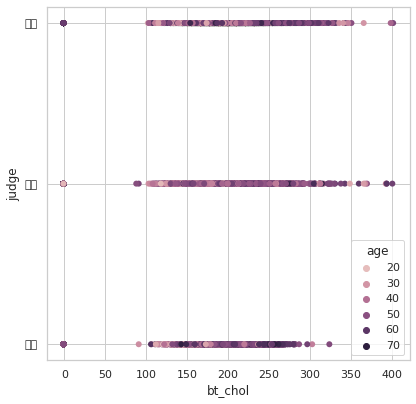

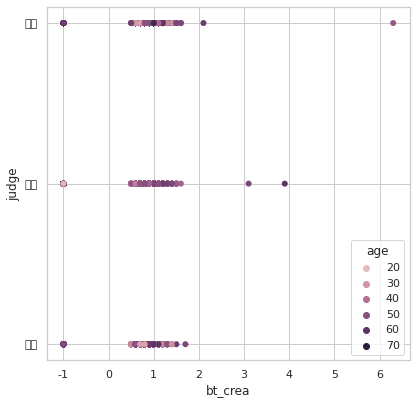

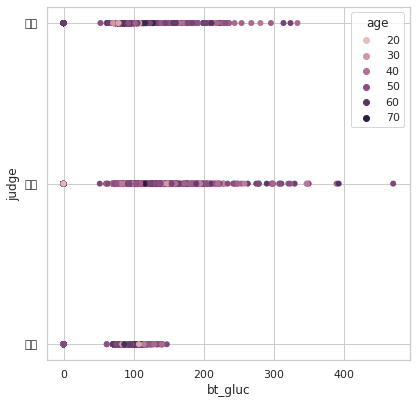

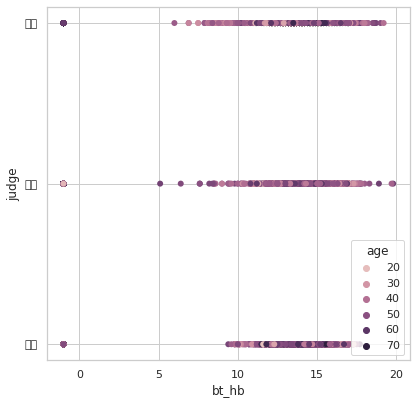

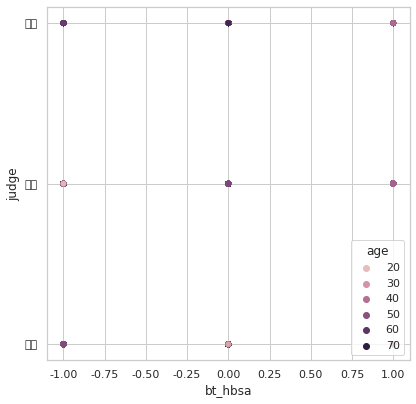

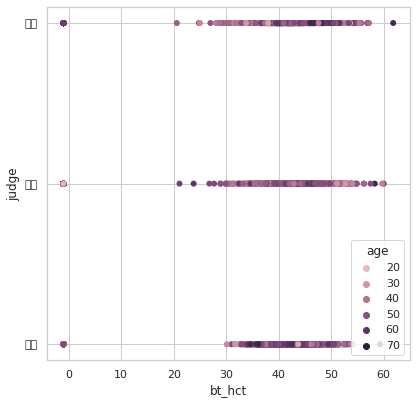

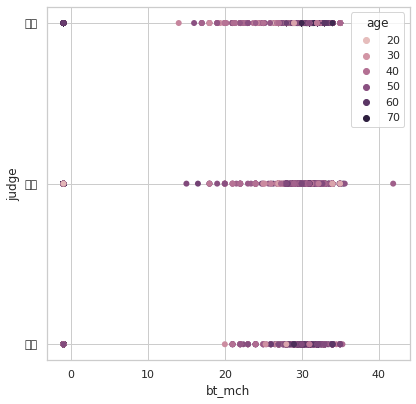

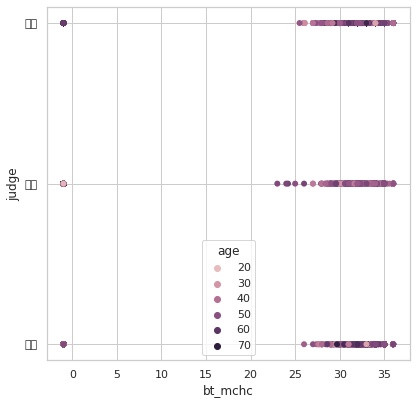

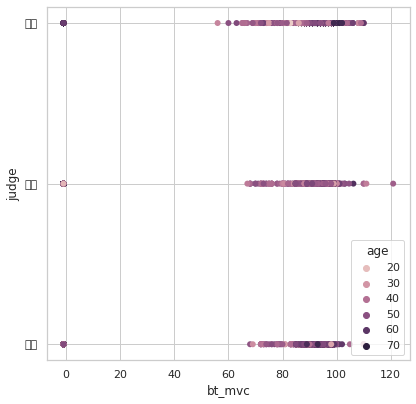

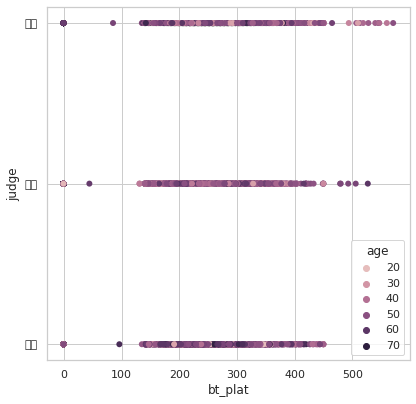

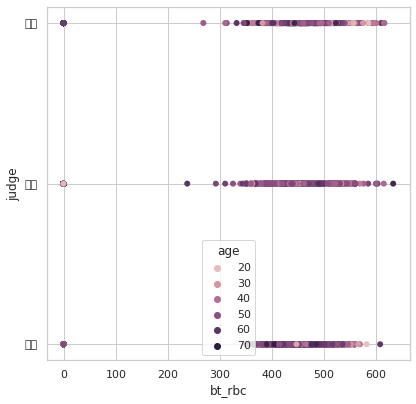

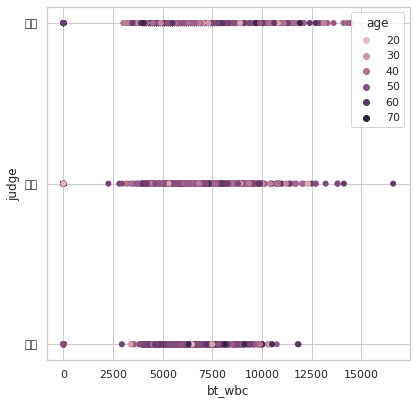

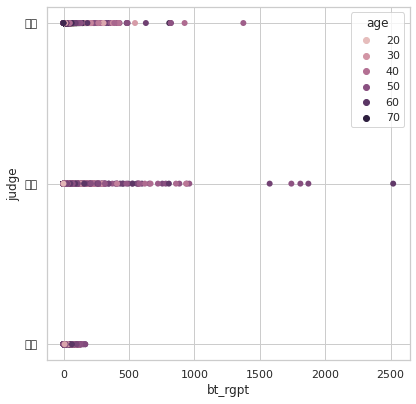

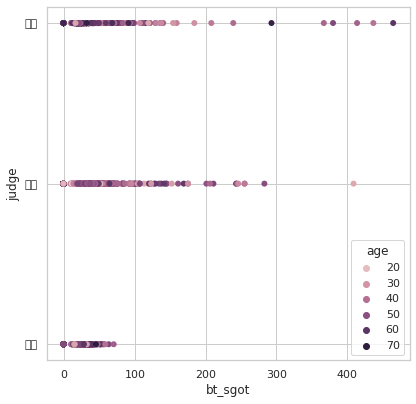

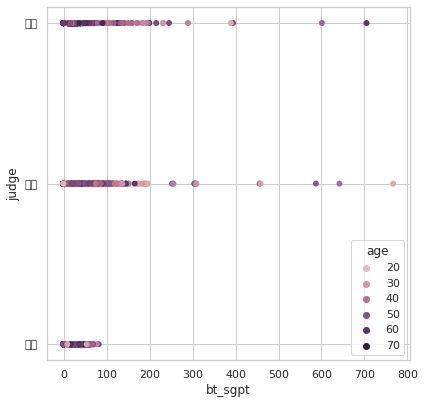

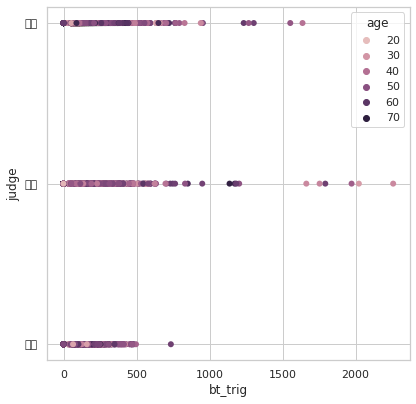

In [46]:
for col in df_blood :
    blood_plot_maker(col)

In [47]:
df_pre.isnull().sum()

customer_id          0
review_cat           0
judge                0
review_date          0
gender               0
age                  0
height               0
weight               0
bust                 0
waist                0
bp_min               0
bp_max               0
pulse_count          0
bt_chol              0
bt_crea              0
bt_gluc              0
bt_hb                0
bt_hbsa              0
bt_hct               0
bt_mch               0
bt_mchc              0
bt_mvc               0
bt_plat              0
bt_rbc               0
bt_wbc               0
bt_rgpt              0
bt_sgot              0
bt_sgpt              0
bt_trig              0
judge_score          0
bp_judge             0
pulse_count_judge    0
bt_chol_judge        0
bt_crea_judge        0
bt_gluc_judge        0
bt_hb_judge          0
bt_hbsa_judge        0
bt_hct_judge         0
bt_mch_judge         0
bt_mchc_judge        0
bt_mvc_judge         0
bt_plat_judge        0
bt_rbc_judge         0
bt_wbc_judg

In [48]:
df_pre

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,80,130,72.0,140.0,-1.0,81.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,98.0,23.0,20.0,-1.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,80,130,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,80,120,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,80,120,72.0,167.0,0.9,87.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,86.0,28.0,32.0,73.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,205.0,-1.0,83.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,40.0,53.0,-1.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14930,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,80,120,74.0,238.0,-1.0,86.0,13.8,0.0,42.5,29.0,32.0,89.0,310.0,476.0,10500.0,-1.0,-1.0,16.0,-1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14931,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,80,120,70.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14932,C134251,일반검진,재검,2015-06-21,2,57,157,48,89.0,72.0,70,110,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14933,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,100,150,88.0,154.0,1.0,116.0,13.5,0.0,46.0,30.0,33.0,99.0,142.0,443.0,4000.0,-1.0,-1.0,36.0,88.0,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_pre["bmi"] = round((df_pre["weight"])/((df_pre["height"]/100)**2),1)

In [50]:
df_pre["whtr"] = round(df_pre["waist"]/(df_pre["height"]/100),1)

In [51]:
df_gender1 = df_pre[df_pre['gender'] == 1]
df_gender1['rfm'] = round(64-(((df_pre["height"]/100)/(df_pre["waist"]/100)))*20,1)
df_gender2 = df_pre[df_pre['gender'] == 2]
df_gender2['rfm'] = round(76-(((df_pre["height"]/100)/(df_pre["waist"]/100)))*20,1)

<ipython-input-51-91eecf3ab892>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender1['rfm'] = round(64-(((df_pre["height"]/100)/(df_pre["waist"]/100)))*20,1)
<ipython-input-51-91eecf3ab892>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender2['rfm'] = round(76-(((df_pre["height"]/100)/(df_pre["waist"]/100)))*20,1)


In [52]:
df_gender = pd.merge(df_gender1, df_gender2, how='outer')

In [53]:
df_pre = df_gender

In [54]:
df_pre.to_csv("pre_review_preprocessing.csv",encoding='euc-kr')

<AxesSubplot:xlabel='gender', ylabel='height'>

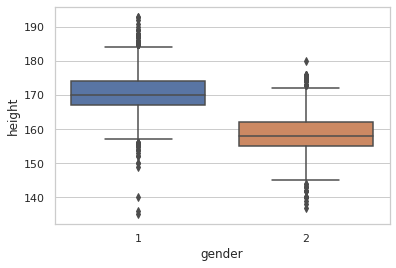

In [55]:
import seaborn as sns
sns.boxplot(x="gender", y="height", data=df_pre)

<AxesSubplot:xlabel='gender', ylabel='weight'>

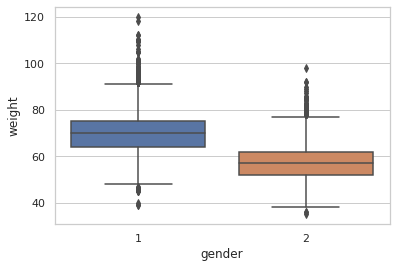

In [56]:
import seaborn as sns
sns.boxplot(x="gender", y="weight", data=df_pre)

## height & weight

<AxesSubplot:xlabel='height', ylabel='weight'>

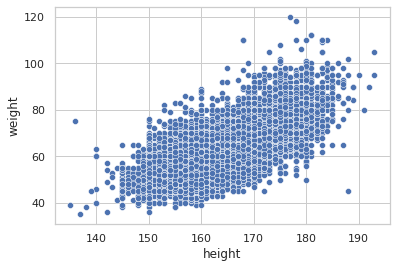

In [57]:
sns.scatterplot(x="height",y="weight",data=df_pre)

In [58]:
df_pre[(df_pre["height"]<130)&(df_pre["weight"]<50)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm


In [59]:
a = df_pre[(df_pre["height"]<130)&(df_pre["weight"]<50)].index
print(a)

Int64Index([], dtype='int64')


In [60]:
df_pre.drop(a, inplace = True)

In [61]:
df_pre[(df_pre["height"]<140)&(df_pre["weight"]>60)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm
6876,C122413,일반검진,거절,2015-03-23,1,21,136,75,111.0,106.0,85,120,66.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,40.5,77.9,38.3


In [62]:
b =df_pre[(df_pre["height"]<140)&(df_pre["weight"]>60)].index
print(b)

Int64Index([6876], dtype='int64')


In [63]:
df_pre.drop(b, inplace=True)

In [64]:
df_pre[(df_pre["height"]>180)&(df_pre["weight"]<60)]

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm
5965,C121030,혈액검사,거절,2014-10-21,1,32,188,45,95.0,85.0,80,120,60.0,132.0,-1.0,76.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,129.0,41.0,44.0,-1.0,4,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,12.7,45.2,19.8


In [65]:
c = df_pre[(df_pre["height"]>180)&(df_pre["weight"]<60)].index
print(c)

Int64Index([5965], dtype='int64')


In [66]:
df_pre.drop(c, inplace=True)

In [67]:
# 이상치였던 3명 제거.
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14933 entries, 0 to 14934
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        14933 non-null  object 
 1   review_cat         14933 non-null  object 
 2   judge              14933 non-null  object 
 3   review_date        14933 non-null  object 
 4   gender             14933 non-null  int64  
 5   age                14933 non-null  int64  
 6   height             14933 non-null  int64  
 7   weight             14933 non-null  int64  
 8   bust               14933 non-null  float64
 9   waist              14933 non-null  float64
 10  bp_min             14933 non-null  int64  
 11  bp_max             14933 non-null  int64  
 12  pulse_count        14933 non-null  float64
 13  bt_chol            14933 non-null  float64
 14  bt_crea            14933 non-null  float64
 15  bt_gluc            14933 non-null  float64
 16  bt_hb              149

<AxesSubplot:xlabel='height', ylabel='weight'>

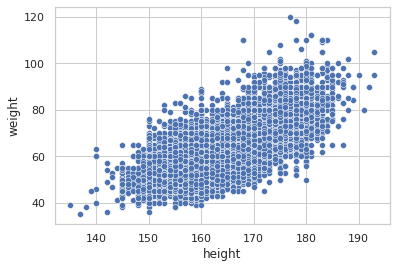

In [68]:
sns.scatterplot(x="height",y="weight",data=df_pre)

In [69]:
# 신장과 체중의 상관 분석 - 이상치 제거 전
# 매우 강한 양의 상관 관계
df_pre["height"].corr(df_pre["weight"])

0.7192205844905807

In [70]:
# 신장과 체중의 상관 분석 - 이상치 제거 후
# 매우 강한 양의 상관 관계
df_pre["height"].corr(df_pre["weight"])

0.7192205844905807

In [71]:
df_pre.reset_index(drop=True,inplace=True)
df_pre

,customer_id,review_cat,judge,review_date,gender,age,height,weight,bust,waist,bp_min,bp_max,pulse_count,bt_chol,bt_crea,bt_gluc,bt_hb,bt_hbsa,bt_hct,bt_mch,bt_mchc,bt_mvc,bt_plat,bt_rbc,bt_wbc,bt_rgpt,bt_sgot,bt_sgpt,bt_trig,judge_score,bp_judge,pulse_count_judge,bt_chol_judge,bt_crea_judge,bt_gluc_judge,bt_hb_judge,bt_hbsa_judge,bt_hct_judge,bt_mch_judge,bt_mchc_judge,bt_mvc_judge,bt_plat_judge,bt_rbc_judge,bt_wbc_judge,bt_rgpt_judge,bt_sgot_judge,bt_sgpt_judge,bt_trig_judge,bmi,whtr,rfm
0,C112346,혈액검사,재검,2014-10-09,1,70,165,63,92.0,88.0,80,130,72.0,140.0,-1.0,81.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,98.0,23.0,20.0,-1.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.1,53.3,26.5
1,C112350,일반검진,재검,2014-11-18,1,69,178,75,99.0,92.0,80,130,60.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,23.7,51.7,25.3
2,C112355,일반검진,재검,2015-03-18,1,70,169,69,96.0,88.0,80,120,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,24.2,52.1,25.6
3,C112356,혈액검사,재검,2015-09-28,1,70,165,64,103.0,92.0,80,120,72.0,167.0,0.9,87.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,86.0,28.0,32.0,73.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.5,55.8,28.1
4,C112358,혈액검사,거절,2015-02-24,1,70,166,73,100.0,91.0,85,130,76.0,205.0,-1.0,83.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,35.0,40.0,53.0,-1.0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.5,54.8,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14928,C134246,혈액검사,승인,2015-02-11,2,63,150,53,94.0,80.0,80,120,74.0,238.0,-1.0,86.0,13.8,0.0,42.5,29.0,32.0,89.0,310.0,476.0,10500.0,-1.0,-1.0,16.0,-1.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.6,53.3,38.5
14929,C134250,일반검진,승인,2015-09-16,2,52,164,60,90.0,66.0,80,120,70.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,22.3,40.2,26.3
14930,C134251,일반검진,재검,2015-06-21,2,57,157,48,89.0,72.0,70,110,72.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,19.5,45.9,32.4
14931,C134252,혈액검사,재검,2015-06-26,2,66,150,47,86.0,84.0,100,150,88.0,154.0,1.0,116.0,13.5,0.0,46.0,30.0,33.0,99.0,142.0,443.0,4000.0,-1.0,-1.0,36.0,88.0,1,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.9,56.0,40.3


## 남자의 경우 키, 체중의 이상치

In [72]:
# 남자의 키의 이상치
quartile_1 = df_pre[(df_pre["gender"]==1)]["height"].quantile(0.25)
quartile_3 = df_pre[(df_pre["gender"]==1)]["height"].quantile(0.75)
IQR = quartile_3 - quartile_1
df_search_height = df_pre[(df_pre["gender"]==1)][(df_pre[(df_pre["gender"]==1)]['height'] < (quartile_1 - 1.5 * IQR)) 
                   | (df_pre[(df_pre["gender"]==1)]['height'] > (quartile_3 + 1.5 * IQR))]
print(df_search_height)

     customer_id review_cat judge review_date  gender  age  height  weight   bust  waist  bp_min  bp_max  pulse_count  bt_chol  bt_crea  bt_gluc  bt_hb  bt_hbsa  bt_hct  bt_mch  bt_mchc  bt_mvc  bt_plat  bt_rbc  bt_wbc  bt_rgpt  bt_sgot  bt_sgpt  bt_trig  judge_score  bp_judge  pulse_count_judge  bt_chol_judge  bt_crea_judge  bt_gluc_judge  bt_hb_judge  bt_hbsa_judge  bt_hct_judge  bt_mch_judge  bt_mchc_judge  bt_mvc_judge  bt_plat_judge  bt_rbc_judge  bt_wbc_judge  bt_rgpt_judge  bt_sgot_judge  bt_sgpt_judge  bt_trig_judge   bmi  whtr   rfm
8        C112367       일반검진    재검  2014-12-10       1   69     155      55   86.0   74.0      90     150         64.0     -1.0     -1.0     -1.0   -1.0     -1.0    -1.0    -1.0     -1.0    -1.0     -1.0    -1.0    -1.0     -1.0     -1.0     -1.0     -1.0            0         1                  0           -1.0           -1.0           -1.0         -1.0           -1.0          -1.0          -1.0           -1.0          -1.0           -1.0          -

In [73]:
# 남자의 체중 이상치
quartile_1 = df_pre[(df_pre["gender"]==1)]["weight"].quantile(0.25)
quartile_3 = df_pre[(df_pre["gender"]==1)]["weight"].quantile(0.75)
IQR = quartile_3 - quartile_1
df_search_weight = df_pre[(df_pre["gender"]==1)][(df_pre[(df_pre["gender"]==1)]['weight'] < (quartile_1 - 1.5 * IQR)) 
                   | (df_pre[(df_pre["gender"]==1)]['weight'] > (quartile_3 + 1.5 * IQR))]
print(df_search_weight)

     customer_id review_cat judge review_date  gender  age  height  weight   bust  waist  bp_min  bp_max  pulse_count  bt_chol  bt_crea  bt_gluc  bt_hb  bt_hbsa  bt_hct  bt_mch  bt_mchc  bt_mvc  bt_plat  bt_rbc  bt_wbc  bt_rgpt  bt_sgot  bt_sgpt  bt_trig  judge_score  bp_judge  pulse_count_judge  bt_chol_judge  bt_crea_judge  bt_gluc_judge  bt_hb_judge  bt_hbsa_judge  bt_hct_judge  bt_mch_judge  bt_mchc_judge  bt_mvc_judge  bt_plat_judge  bt_rbc_judge  bt_wbc_judge  bt_rgpt_judge  bt_sgot_judge  bt_sgpt_judge  bt_trig_judge   bmi  whtr   rfm
89       C112487       일반검진    재검  2015-01-25       1   68     149      45   84.0   68.0      80     120         72.0     -1.0     -1.0     -1.0   -1.0     -1.0    -1.0    -1.0     -1.0    -1.0     -1.0    -1.0    -1.0     -1.0     -1.0     -1.0     -1.0            4         0                  0           -1.0           -1.0           -1.0         -1.0           -1.0          -1.0          -1.0           -1.0          -1.0           -1.0          -

In [74]:
# 남자의 체중, 신장 데이터 프레임 생성
df = df_pre[["height","weight","gender"]]
df_new = df[df["gender"]==1]
df_new

,height,weight,gender
0,165,63,1
1,178,75,1
2,169,69,1
3,165,64,1
4,166,73,1
...,...,...,...
7056,180,83,1
7057,165,57,1
7058,165,74,1
7059,169,66,1


(array([  12.,  262., 1442., 2366., 1918.,  747.,  245.,   50.,   15.,
           4.]),
 array([ 39. ,  47.1,  55.2,  63.3,  71.4,  79.5,  87.6,  95.7, 103.8,
        111.9, 120. ]),
 <BarContainer object of 10 artists>)

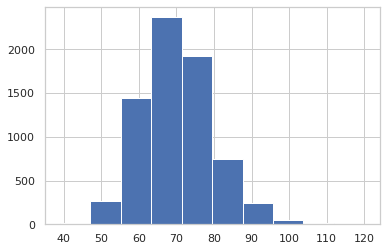

In [75]:
plt.hist(x="weight", data=df_new)

(array([2.000e+00, 0.000e+00, 5.000e+00, 9.200e+01, 7.010e+02, 2.158e+03,
        2.946e+03, 9.840e+02, 1.610e+02, 1.200e+01]),
 array([135. , 140.8, 146.6, 152.4, 158.2, 164. , 169.8, 175.6, 181.4,
        187.2, 193. ]),
 <BarContainer object of 10 artists>)

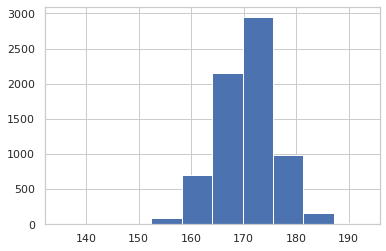

In [76]:
plt.hist(x="height", data=df_new)

In [77]:
# 남자의 체중, 신장의 이상치 - Zscore를 통한 이상치 확인
from scipy import stats
df_new["z_score_w"]= stats.zscore(df_new["weight"])
df_new["z_score_h"]= stats.zscore(df_new["height"])
df_new[((df_new["z_score_w"]>2)|(df_new["z_score_w"]<-2))
       &((df_new["z_score_h"]>2)|(df_new["z_score_h"]<-2))]

<ipython-input-77-fffc80b40a5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["z_score_w"]= stats.zscore(df_new["weight"])
<ipython-input-77-fffc80b40a5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["z_score_h"]= stats.zscore(df_new["height"])


,height,weight,gender,z_score_w,z_score_h
89,149,45,1,-2.734260,-3.798853
110,158,50,1,-2.193037,-2.195012
178,155,50,1,-2.193037,-2.729626
416,158,50,1,-2.193037,-2.195012
469,156,50,1,-2.193037,-2.551421
694,158,50,1,-2.193037,-2.195012
1099,155,48,1,-2.409526,-2.729626
1392,155,50,1,-2.193037,-2.729626
1453,158,50,1,-2.193037,-2.195012
1670,154,46,1,-2.626015,-2.907830


In [78]:
# 신장과 체중의 상관계수 - 이상치 제거 전
df_new["height"].corr(df_new["weight"])

0.5856516308981399

<AxesSubplot:xlabel='weight', ylabel='height'>

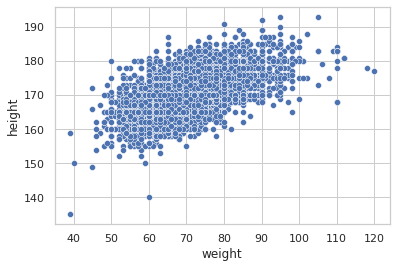

In [79]:
# 남자의 체중, 신장의 이상치 Scatterplot
sns.scatterplot(x="weight", y="height", data=df_new)

In [80]:
# 남자의 체중, 신장의 이상치 - Robust를 통한 이상치 확인
quartile_1 = df_new.quantile(0.25)
quartile_3 = df_new.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (df_new < (quartile_1 - 1.5 * IQR)) | (df_new > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
df_search_wh = df_new[condition]
print(df_search_wh)

      height  weight  gender  z_score_w  z_score_h
8        155      55       1  -1.651814  -2.729626
75       156      55       1  -1.651814  -2.551421
89       149      45       1  -2.734260  -3.798853
178      155      50       1  -2.193037  -2.729626
191      155      56       1  -1.543570  -2.729626
214      179      95       1   2.677968   1.547283
252      156      62       1  -0.894102  -2.551421
320      168      97       1   2.894457  -0.412967
469      156      50       1  -2.193037  -2.551421
553      155      60       1  -1.110591  -2.729626
568      156      61       1  -1.002347  -2.551421
598      155      53       1  -1.868303  -2.729626
667      155      55       1  -1.651814  -2.729626
680      155      61       1  -1.002347  -2.729626
870      179      93       1   2.461479   1.547283
1019     185      76       1   0.621322   2.616510
1037     156      56       1  -1.543570  -2.551421
1053     154      58       1  -1.327080  -2.907830
1099     155      48       1  -

## 산점도, zscore, robust 종합한 이상치 제거

In [81]:
df_new[(df_new["weight"]<40)&(df_new["height"]<140)]

,height,weight,gender,z_score_w,z_score_h
6805,135,39,1,-3.383727,-6.293716


In [82]:
a = df_new[(df_new["weight"]<40)&(df_new["height"]<140)].index
a

Int64Index([6805], dtype='int64')

In [83]:
df_new.drop(a, inplace=True)

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
df_new[(df_new["weight"]>50)&(df_new["height"]<150)]

,height,weight,gender,z_score_w,z_score_h
5367,140,60,1,-1.110591,-5.402693


In [85]:
b = df_new[(df_new["weight"]>50)&(df_new["height"]<150)].index
b

Int64Index([5367], dtype='int64')

In [86]:
df_new.drop(b, inplace=True)

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [87]:
df_new[(df_new["weight"]>100)&(df_new["height"]>190)]

,height,weight,gender,z_score_w,z_score_h
5643,193,105,1,3.760414,4.042146


In [88]:
c = df_new[(df_new["weight"]>100)&(df_new["height"]>190)].index
c

Int64Index([5643], dtype='int64')

In [89]:
df_new.drop(c, inplace=True)

/home/piai/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [90]:
# 신장과 체중의 상관계수 - 이상치 제거 후
df_new["height"].corr(df_new["weight"])

0.5842706386615802

<AxesSubplot:xlabel='weight', ylabel='height'>

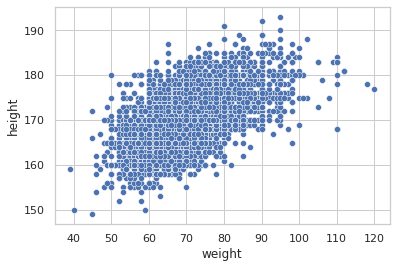

In [91]:
# 남자의 체중, 신장의 이상치 Scatterplot
sns.scatterplot(x="weight", y="height", data=df_new)

## 여자의 체중, 신장 이상치 확인

In [92]:
# 여자의 체중, 신장 데이터 프레임
df = df_pre[["height","weight","gender"]]
df_new2 = df[df["gender"]==2]
df_new2

,height,weight,gender
7061,176,82,2
7062,164,55,2
7063,150,55,2
7064,155,56,2
7065,150,58,2
...,...,...,...
14928,150,53,2
14929,164,60,2
14930,157,48,2
14931,150,47,2


<AxesSubplot:xlabel='weight', ylabel='height'>

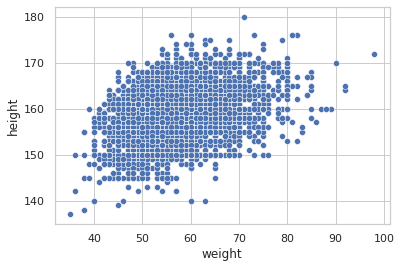

In [93]:
# 여자의 체중, 신장의 이상치
sns.scatterplot(x="weight",y="height",data=df_new2)

In [94]:
# 신장과 체중의 상관계수 - 이상치 제거 전
df_new2["weight"].corr(df_new2["height"])

0.38414056911794475

In [95]:
# 여자의 체중, 신장의 이상치 - Zscore를 통한 이상치 확인
import warnings
warnings.filterwarnings("ignore")
df_new2["z_score_w"]= stats.zscore(df_new2["weight"])
df_new2["z_score_h"]= stats.zscore(df_new2["height"])
df_new2[((df_new2["z_score_w"]>3)|(df_new2["z_score_w"]<-3))
       &((df_new2["z_score_h"]>3)|(df_new2["z_score_h"]<-3))]

,height,weight,gender,z_score_w,z_score_h
7061,176,82,2,3.377703,3.483425
13000,137,35,2,-3.046247,-4.262824
13470,176,81,2,3.241023,3.483425


In [96]:
# 여자의 체중과 신장 이상치 - Robust를 통한 이상치 확인
quartile_1 = df_new2.quantile(0.25)
quartile_3 = df_new2.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (df_new2 < (quartile_1 - 1.5 * IQR)) |(df_new2 > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
df_search_wh = df_new2[condition]
print(df_search_wh)

       height  weight  gender  z_score_w  z_score_h
7061      176      82       2   3.377703   3.483425
7158      158      80       2   3.104343  -0.091767
7167      140      46       2  -1.542770  -3.666959
7321      157      79       2   2.967664  -0.290388
7410      160      80       2   3.104343   0.305477
7458      162      82       2   3.377703   0.702720
7470      163      80       2   3.104343   0.901342
7571      140      60       2   0.370747  -3.666959
7664      142      54       2  -0.449331  -3.269715
7757      160      78       2   2.830984   0.305477
7802      153      82       2   3.377703  -1.084876
7857      140      40       2  -2.362849  -3.666959
7899      165      78       2   2.830984   1.298586
8474      160      80       2   3.104343   0.305477
8743      157      86       2   3.924422  -0.290388
8791      164      78       2   2.830984   1.099964
8848      165      80       2   3.104343   1.298586
8963      165      82       2   3.377703   1.298586
9019      14

<AxesSubplot:xlabel='weight', ylabel='height'>

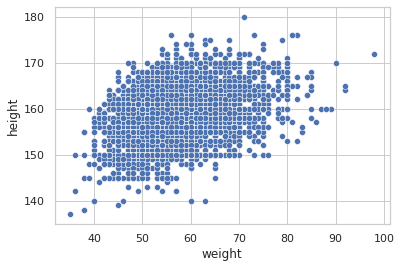

In [97]:
sns.scatterplot(x="weight", y="height", data=df_new2)

## 이상치 제거 

In [98]:
df_new2[((df_new2["z_score_w"]>3)|(df_new2["z_score_w"]<-3))
       &((df_new2["z_score_h"]>3)|(df_new2["z_score_h"]<-3))]

,height,weight,gender,z_score_w,z_score_h
7061,176,82,2,3.377703,3.483425
13000,137,35,2,-3.046247,-4.262824
13470,176,81,2,3.241023,3.483425


In [99]:
aa = df_new2[((df_new2["z_score_w"]>3)|(df_new2["z_score_w"]<-3))
       &((df_new2["z_score_h"]>3)|(df_new2["z_score_h"]<-3))].index
aa

Int64Index([7061, 13000, 13470], dtype='int64')

In [100]:
df_new2.drop(aa, inplace=True)

In [101]:
df_new2[(df_new2["weight"]>60)&(df_new2["height"]>177)]

,height,weight,gender,z_score_w,z_score_h
13984,180,71,2,1.874225,4.277912


In [102]:
e = df_new2[(df_new2["weight"]>60)&(df_new2["height"]>177)].index
print(e)
df_new2.drop(e, inplace=True)

Int64Index([13984], dtype='int64')


In [103]:
# 신장과 체중의 상관계수 - 이상치 제거 후
df_new2["weight"].corr(df_new2["height"])

0.38085264032586863

### 이상치 제거한 남자, 여자 데이터 프레임 합치기

In [104]:
new = df_new2.append(df_new)
print(new)

      height  weight  gender  z_score_w  z_score_h
7062     164      55       2  -0.312652   1.099964
7063     150      55       2  -0.312652  -1.680741
7064     155      56       2  -0.175972  -0.687632
7065     150      58       2   0.097388  -1.680741
7066     148      43       2  -1.952809  -2.077984
...      ...     ...     ...        ...        ...
7056     180      83       1   1.379034   1.725487
7057     165      57       1  -1.435325  -0.947581
7058     165      74       1   0.404833  -0.947581
7059     169      66       1  -0.461124  -0.234763
7060     170      61       1  -1.002347  -0.056558

[14926 rows x 5 columns]


<AxesSubplot:xlabel='weight', ylabel='height'>

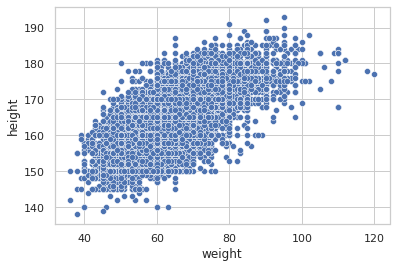

In [105]:
sns.scatterplot(x="weight", y="height", data=new)

In [106]:
new["height"].corr(new["weight"])

0.7187481089838137

In [107]:
new[(new["weight"]>108)&(new["height"]<170)]

,height,weight,gender,z_score_w,z_score_h
5554,168,110,1,4.301637,-0.412967
6522,168,110,1,4.301637,-0.412967


In [108]:
hh = new[(new["weight"]>108)&(new["height"]<170)].index
print(hh)
new.drop(hh, inplace=True)

Int64Index([5554, 6522], dtype='int64')


In [109]:
new["height"].corr(new["weight"])

0.7194144565719968

<AxesSubplot:xlabel='weight', ylabel='height'>

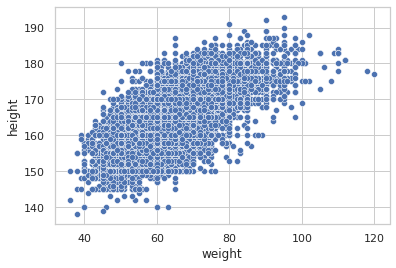

In [110]:
sns.scatterplot(x="weight", y="height", data=new)

In [111]:
new[(new["weight"]>115)&(new["height"]>170)]

,height,weight,gender,z_score_w,z_score_h
4577,177,120,1,5.384082,1.190874
6486,178,118,1,5.167593,1.369078


In [112]:
aa = new[(new["weight"]>115)&(new["height"]>170)].index
new.drop(aa, inplace=True)

In [113]:
new["height"].corr(new["weight"])

0.719708091998408

<AxesSubplot:xlabel='weight', ylabel='height'>

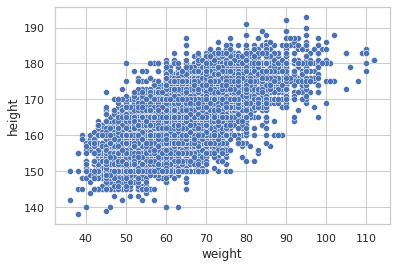

In [114]:
sns.scatterplot(x="weight", y="height", data=new)

In [115]:
new[(new["weight"]<45)&(new["height"]<130)]

,height,weight,gender,z_score_w,z_score_h


<AxesSubplot:xlabel='weight', ylabel='height'>

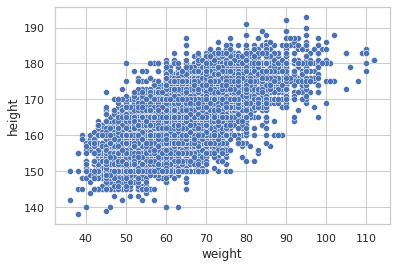

In [116]:
hihi = new[(new["weight"]<45)&(new["height"]<130)].index
new.drop(hihi, inplace=True)
sns.scatterplot(x="weight", y="height", data=new)

In [117]:
new["height"].corr(new["weight"])

0.719708091998408